# Asthma Prediction Report (Synthetic Dataset)

## 📚 Project Background

This project presents a **synthetic asthma dataset** designed to simulate patient health records with features that influence asthma diagnosis and control. The goal is to **explore, visualize, and build machine learning models** to predict whether a patient has asthma based on environmental, clinical indicators, and lifestyle.

The dataset contains **10,000 synthetic patient records**, each with variables like age, Body Mass Index (BMI), smoking status, air pollution exposure, allergies, and more.

---

## 📋 Dataset Overview

| Feature                  | Description                                |
|--------------------------|--------------------------------------------|
| `Age`                    | Age of the patient                         |
| `Gender`                 | Male, Female, Other                        |
| `BMI`                    | Body Mass Index                            |
| `Smoking_Status`         | Current, Former, Never smoker              |
| `Family_History`         | History of asthma in the family            |
| `Allergies`              | Dust, Pollen, Pets, etc...                 |
| `Air_Pollution_Level`    | Pollution Exposure (Low, Moderate, High)   |
| `Physical_Activity_Level`| Activity level (Sedentary to Active)       |
| `Occupation_Type`        | Indoor, Outdoor                            |
| `Comorbidities`          | Health Issues (Diabetes, Hypertension)     |
| `Medication_Adherence`   | Patient consistency with medication        |
| `Peak_Expiratory_Flow`   | A lung function metric (L/min)             |
| `FeNO_Level`             | Exhaled nitric oxide — inflammation marker |
| `Number_of_ER_Visits`    | ER visits in the previous year             |
| `Has_Asthma`             | **Target variable** (0 = No, 1 = Yes       |
| `Asthma_Control_Level`   | Well, Poorly, Not Controlled               |

---

## 🏗️ Project Objectives

- Check structure and distribution of asthma-related risk factors
- Handle missing values realistically (e.g., in `Allergies`)
- Visualize trends between features and asthma diagnosis
- Build a classification model to predict asthma
- Evaluate performance and feature importance
- Suggest future improvements and use cases

---

## 📊 Exploratory Data Analysis (EDA)

- 🧩 Checked missing values and filled `Allergies` with `"Unknown"`
- 🧩 Visualized distributions of numeric features (Age, BMI, FeNO)
- 🧩 Analyzed asthma prevalence across categories (Smokers, Allergies)
- 🧩 Key patterns discovered:
  - Current smokers, sedentary lifestyle, and family history are high-risk
  - High pollution and multiple allergies also increase asthma likelihood

---

## 🗄️ Classification Model

- 📂 **Model Used**: Random Forest Classifier
- ⚙️ **Train/Test Split**: 75/25 with stratification
- 📈 **Accuracy**: ~93%
- 🏷️ **ROC AUC**: High, indicating strong separation
- 🔍 **Top Features**: Smoking status, allergies, pollution level, BMI

---

## 🎯 Key Takeaways

- The model accurately predicts asthma using lifestyle and clinical indicators.
- Features like `Smoking_Status`, `Air_Pollution_Level`, and `BMI` were highly predictive.
- This synthetic dataset provides a **privacy-safe** resource for ML researchers and healthcare educators.

---

## 💡 Use Cases

- Machine learning classification projects


In [1]:
pip install scikit-learn==1.7.1


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl (8.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [3]:
asthma_data = pd.read_csv("synthetic_asthma_dataset.csv")

In [4]:
# 1. Data Overview
print("Shape:", asthma_data.shape)
print("\nColumns:", asthma_data.columns.tolist())
print("\nData Types:\n", asthma_data.dtypes)
print("\nFirst 5 rows:\n", asthma_data.head())

Shape: (10000, 17)

Columns: ['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level']

Data Types:
 Patient_ID                  object
Age                          int64
Gender                      object
BMI                        float64
Smoking_Status              object
Family_History               int64
Allergies                   object
Air_Pollution_Level         object
Physical_Activity_Level     object
Occupation_Type             object
Comorbidities               object
Medication_Adherence       float64
Number_of_ER_Visits          int64
Peak_Expiratory_Flow       float64
FeNO_Level                 float64
Has_Asthma                   int64
Asthma_Control_Level        object
dtype: object

First 5 rows:
    Patient_ID  Age  Gender   BMI Sm

In [5]:
# 2. Checking for missing values
print("\nMissing Values in Columns:\n", asthma_data.isnull().sum())


Missing Values in Columns:
 Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64


In [6]:
# 3. Summary statistics for numeric columns
print("\nNumeric Summary Statistics:\n", asthma_data.describe())


Numeric Summary Statistics:
                 Age           BMI  Family_History  Medication_Adherence  \
count  10000.000000  10000.000000    10000.000000          10000.000000   
mean      44.930700     25.053320        0.303400              0.497998   
std       25.653559      4.874466        0.459749              0.224809   
min        1.000000     15.000000        0.000000              0.000000   
25%       23.000000     21.600000        0.000000              0.320000   
50%       45.000000     25.000000        0.000000              0.500000   
75%       67.000000     28.400000        1.000000              0.670000   
max       89.000000     45.000000        1.000000              0.990000   

       Number_of_ER_Visits  Peak_Expiratory_Flow    FeNO_Level    Has_Asthma  
count         10000.000000          10000.000000  10000.000000  10000.000000  
mean              1.015900            400.884090     25.101420      0.243300  
std               1.020564             97.531113      9.8

In [7]:
custom_palette = ["#008080", "#70A89F"]
fig, ax = plt.subplots()
bars = sns.countplot(x="Has_Asthma", hue="Has_Asthma", data=asthma_data, palette=custom_palette, ax=ax)
ax.set(xlabel="", ylabel="", yticks=[])
fig.text(0.5, 1.02, "Target Variable: Has_Asthma Distribution", ha="center", va="center", fontsize=16,
         fontweight="bold", color="white", bbox=dict(facecolor=custom_palette[0], boxstyle="round,pad=0.4"))

# 🛠 Label all hue-based bar containers
for container in bars.containers:
    bars.bar_label(container, labels=[f"{int(v):,}" for v in container.datavalues], label_type="edge", padding=3)

plt.tight_layout(), plt.show()

MemoryError: In RendererAgg: Out of memory

<Figure size 1000x600 with 1 Axes>

(None, None)

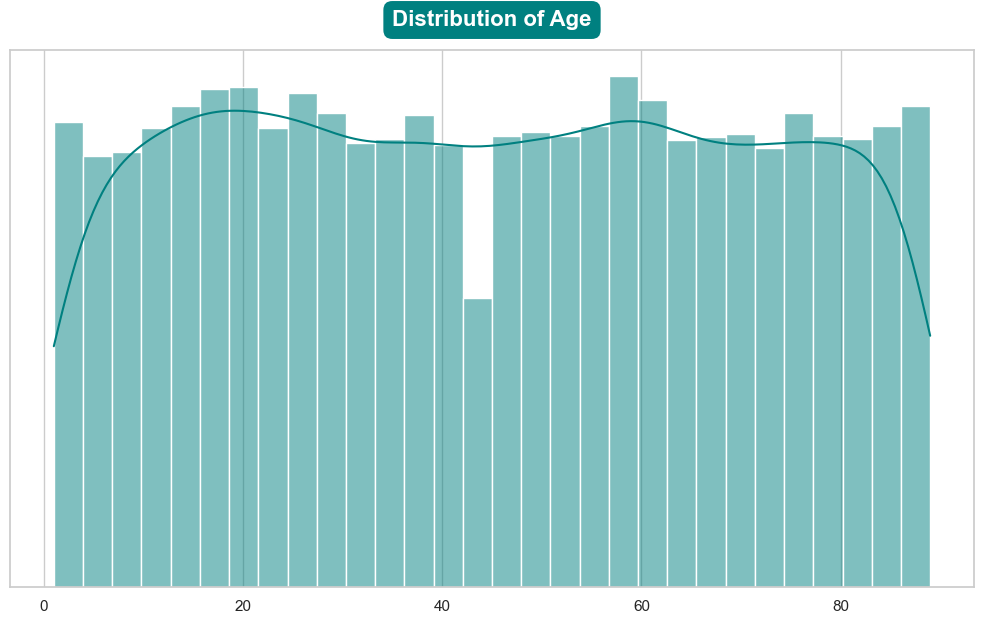

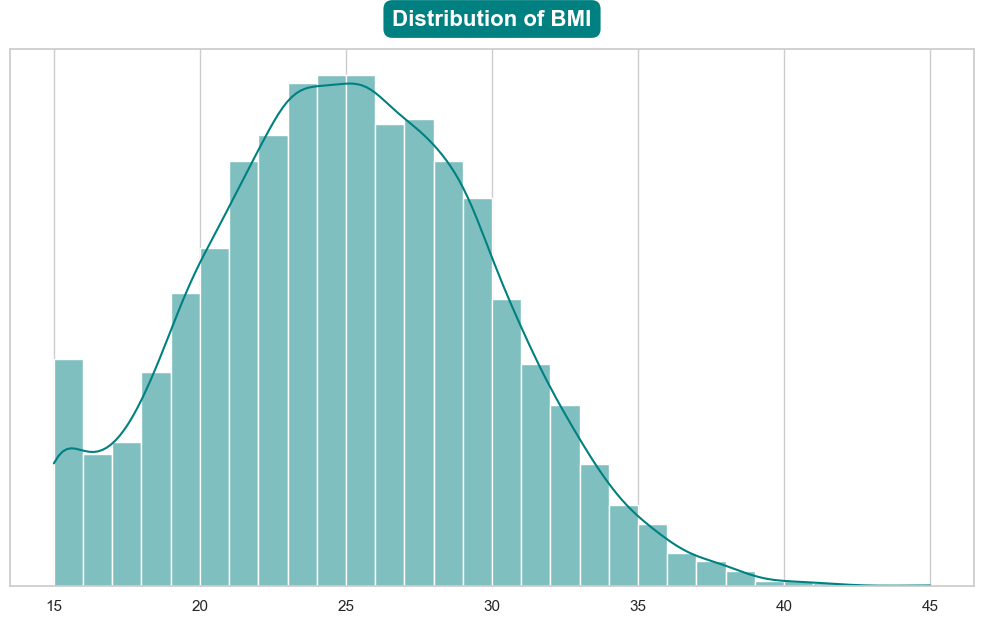

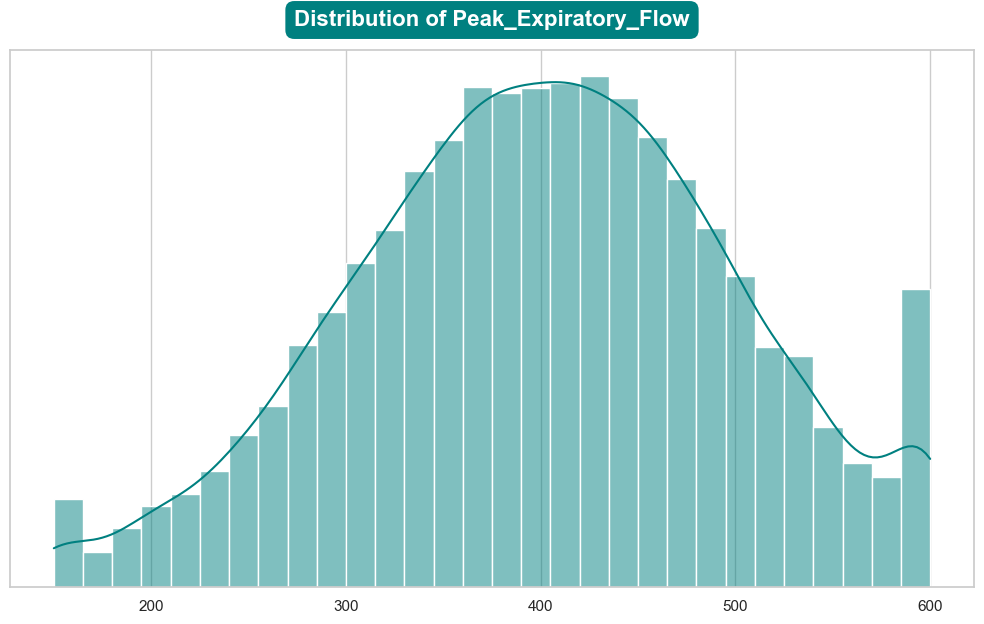

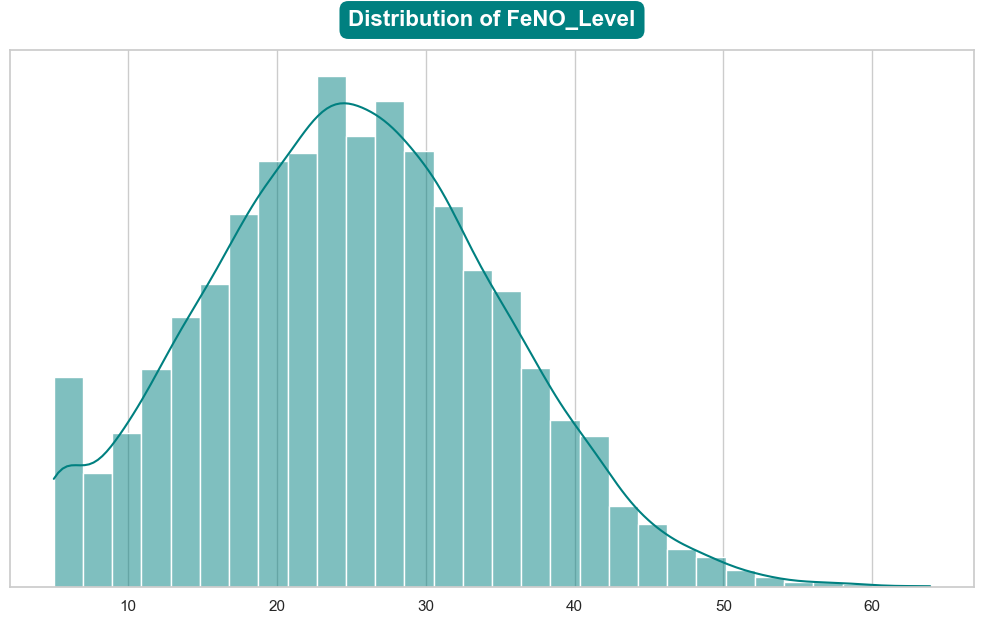

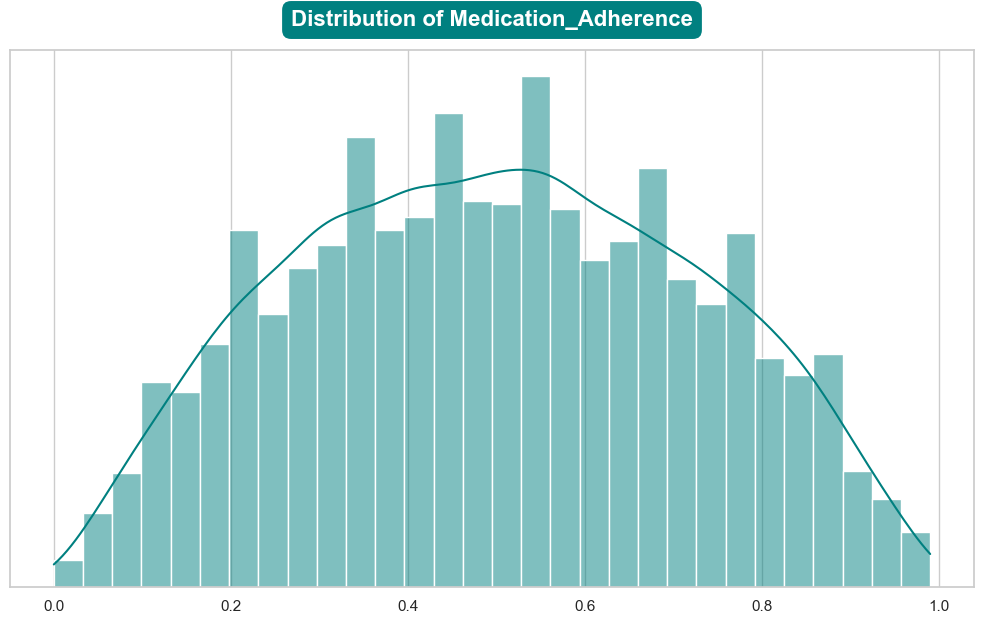

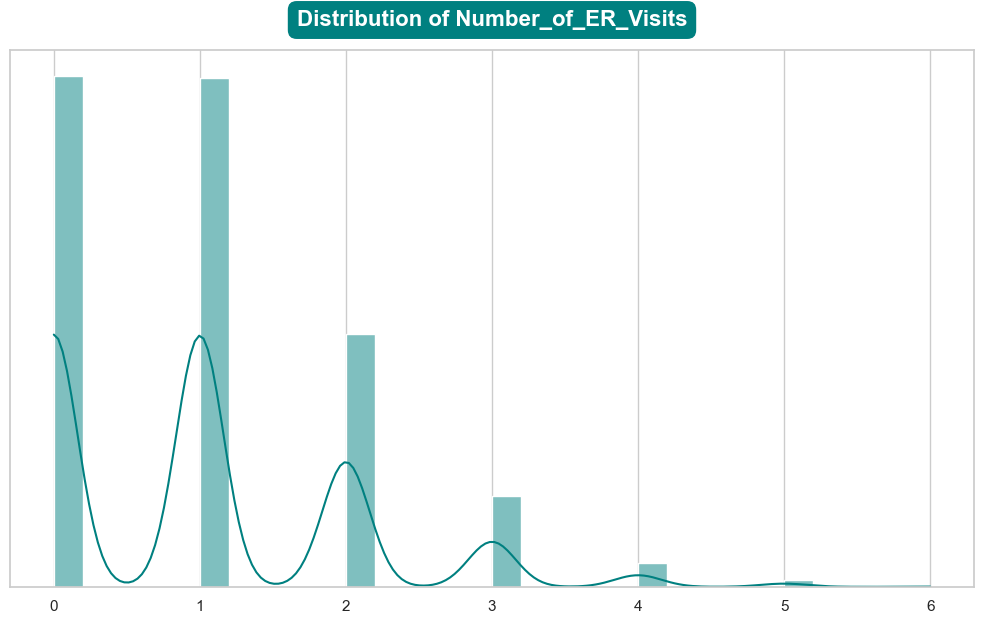

In [8]:
for col in ["Age", "BMI", "Peak_Expiratory_Flow", "FeNO_Level", "Medication_Adherence", "Number_of_ER_Visits"]:
    fig, ax = plt.subplots()
    sns.histplot(asthma_data[col], kde=True, bins=30, color=custom_palette[0], ax=ax)
    ax.set_ylabel(""), ax.set_yticks([]), ax.set_xlabel("")

    fig.text(0.5, 1.02, f"Distribution of {col}", ha="center", va="center",
             fontsize=16, fontweight="bold", color="white",
             bbox=dict(facecolor="#008080", edgecolor="none", boxstyle="round,pad=0.4"))

    plt.tight_layout(), plt.show()

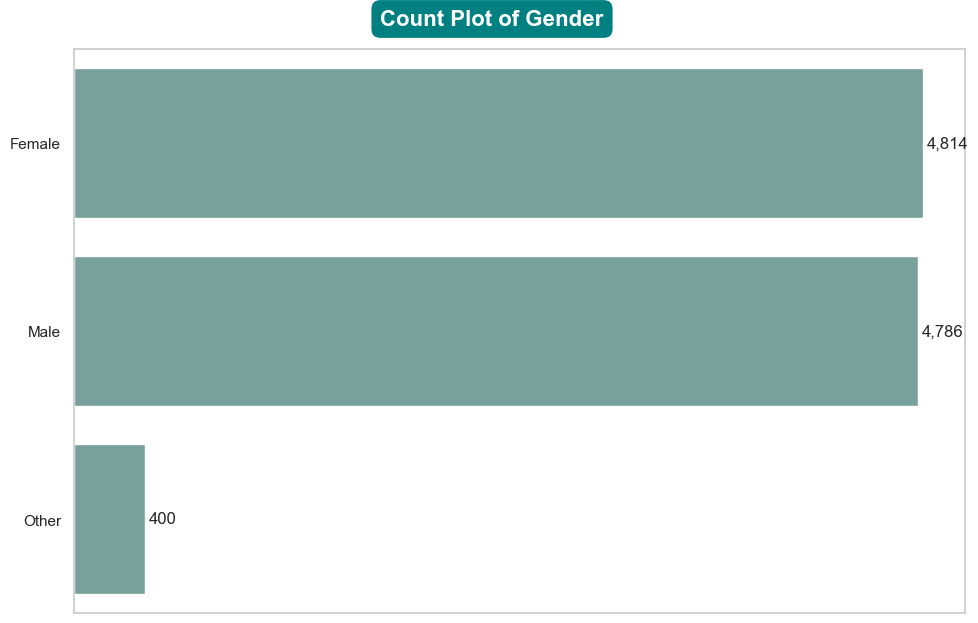

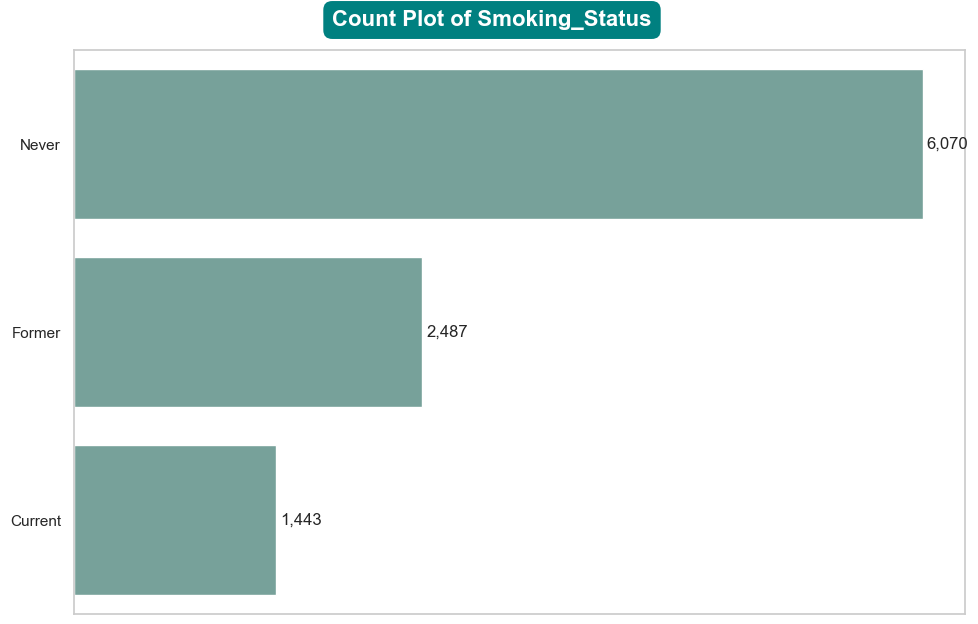

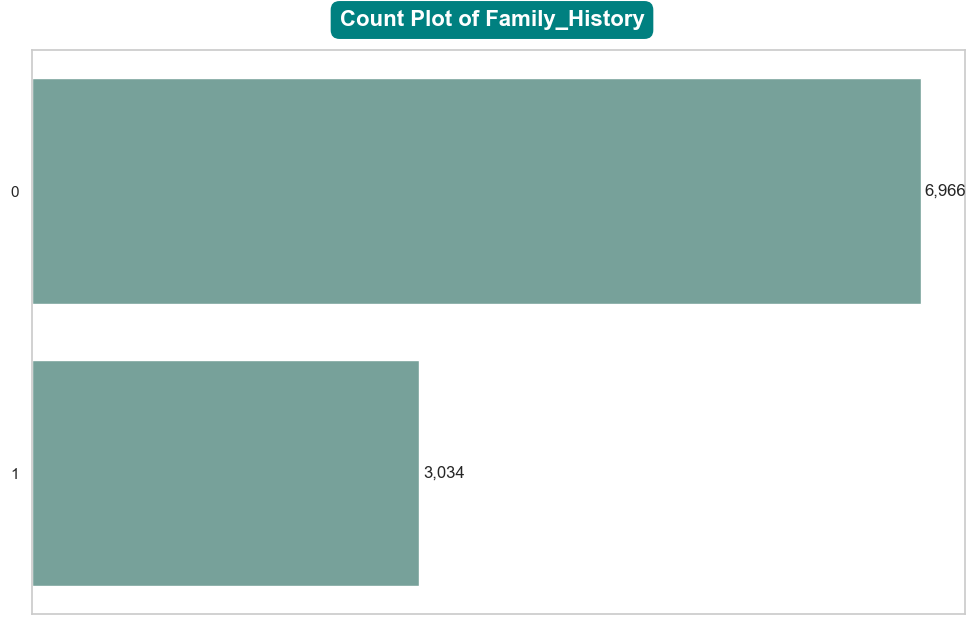

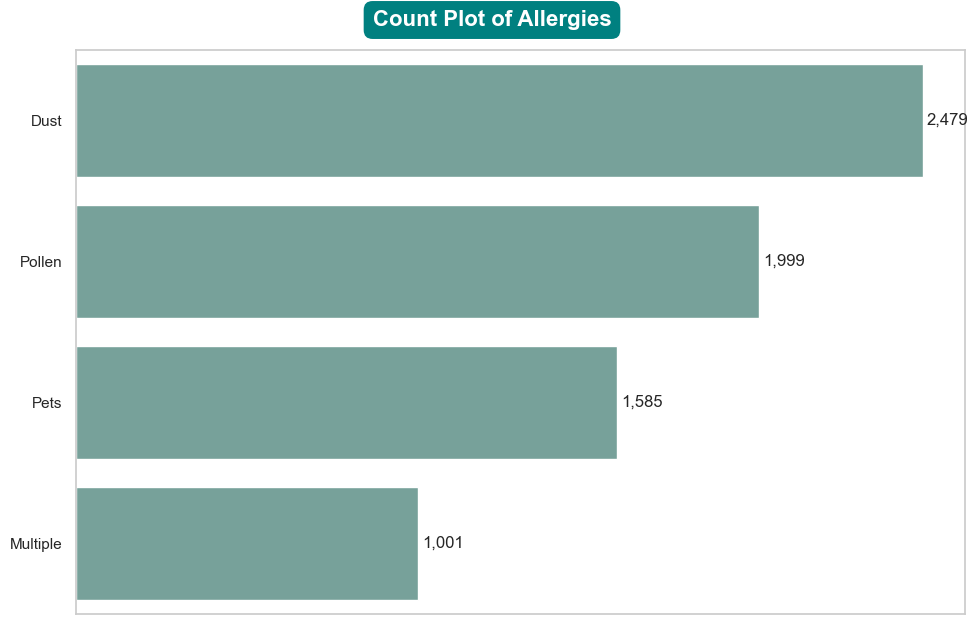

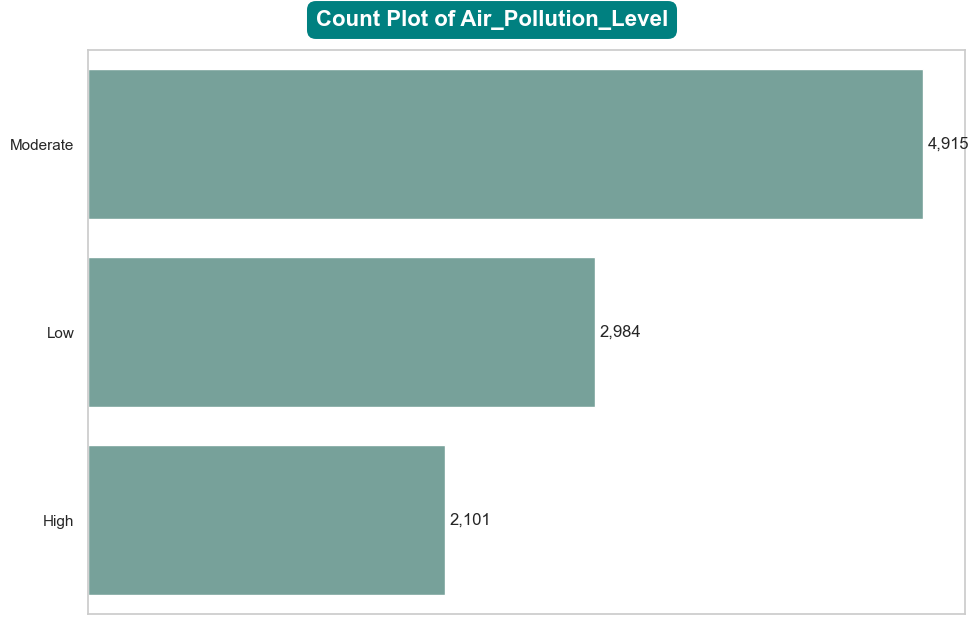

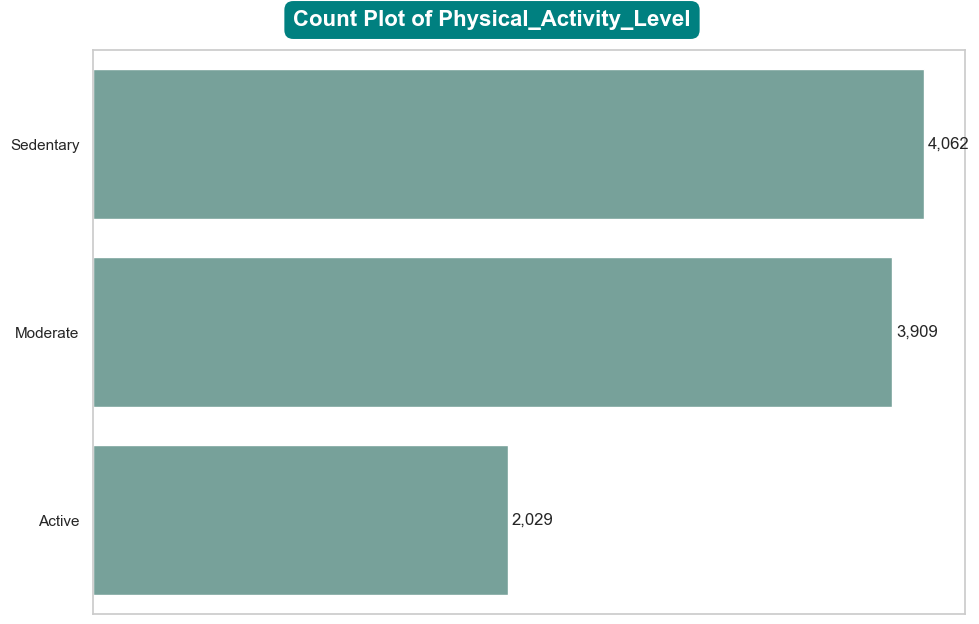

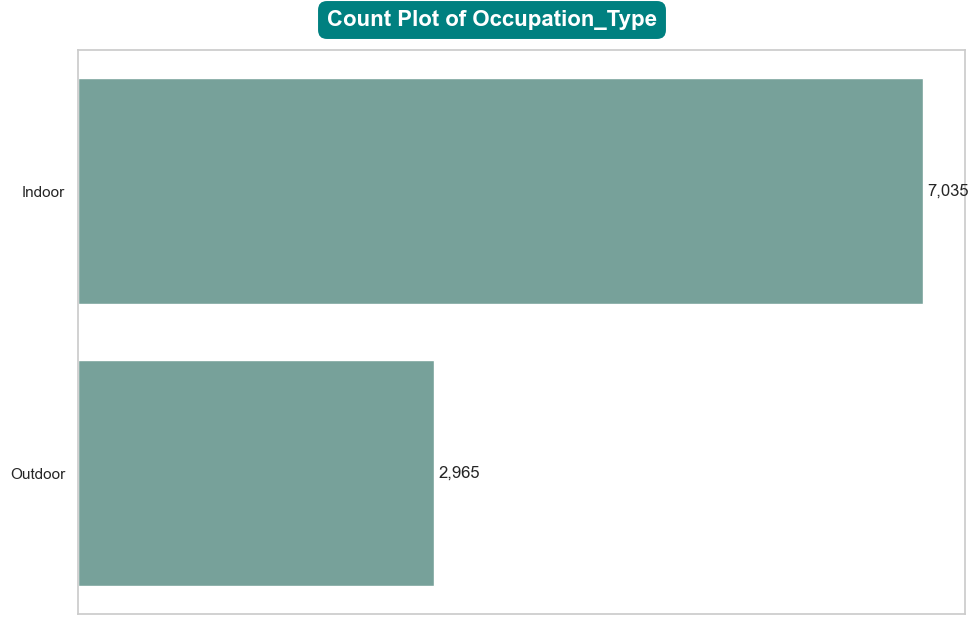

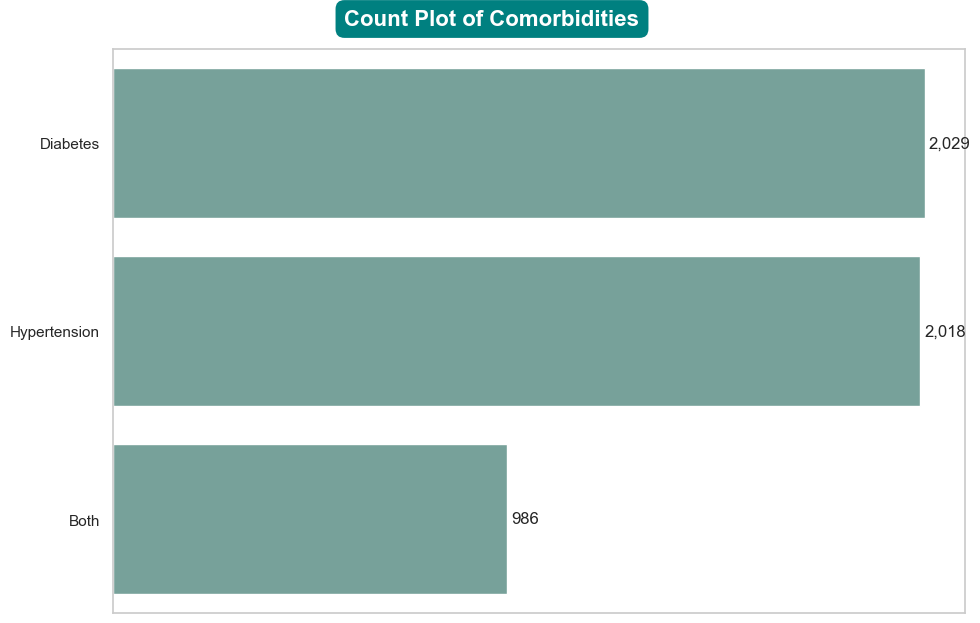

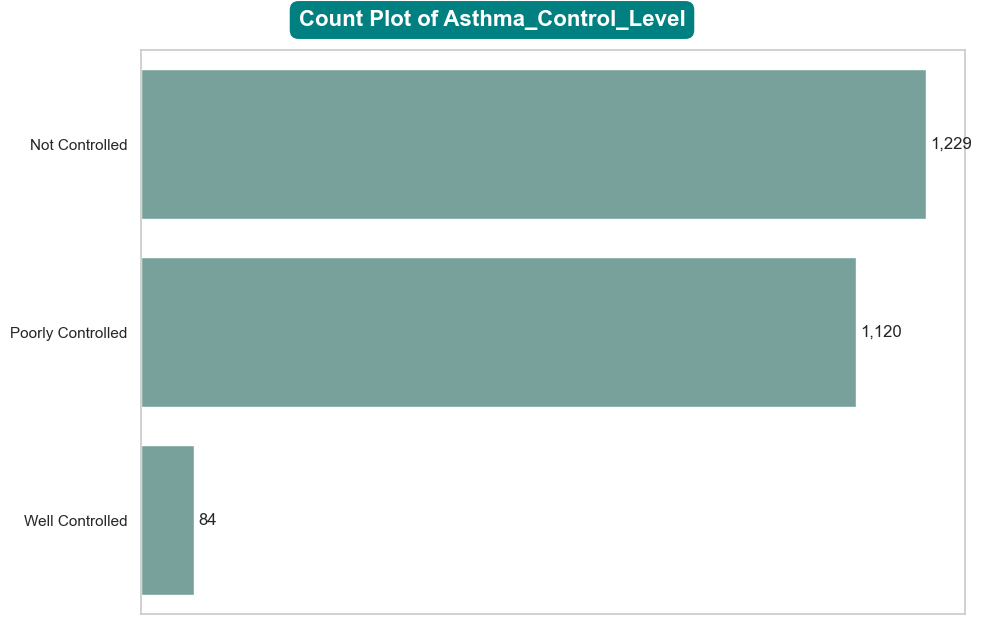

In [9]:
for col in ["Gender", "Smoking_Status", "Family_History", "Allergies", "Air_Pollution_Level",
            "Physical_Activity_Level", "Occupation_Type", "Comorbidities", "Asthma_Control_Level"]:
    fig, ax = plt.subplots()
    bars = sns.countplot(y=col, data=asthma_data, order=asthma_data[col].value_counts().index,
                         ax=ax, color=custom_palette[1])
    ax.set_xlabel(""), ax.set_xticks([]), ax.set_ylabel("")

    fig.text(0.5, 1.02, f"Count Plot of {col}", ha="center", va="center",
             fontsize=16, fontweight="bold", color="white",
             bbox=dict(facecolor="#008080", edgecolor="none", boxstyle="round,pad=0.4"))

    for c in bars.containers:
        bars.bar_label(c, labels=[f"{int(v):,}" for v in c.datavalues], label_type="edge", padding=3)

    plt.tight_layout(), plt.show()

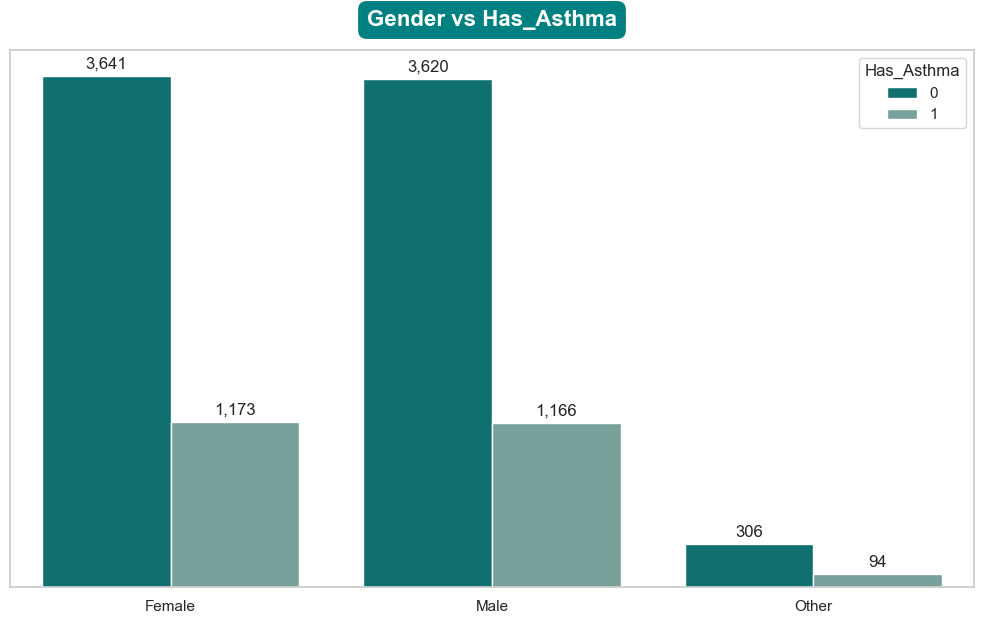

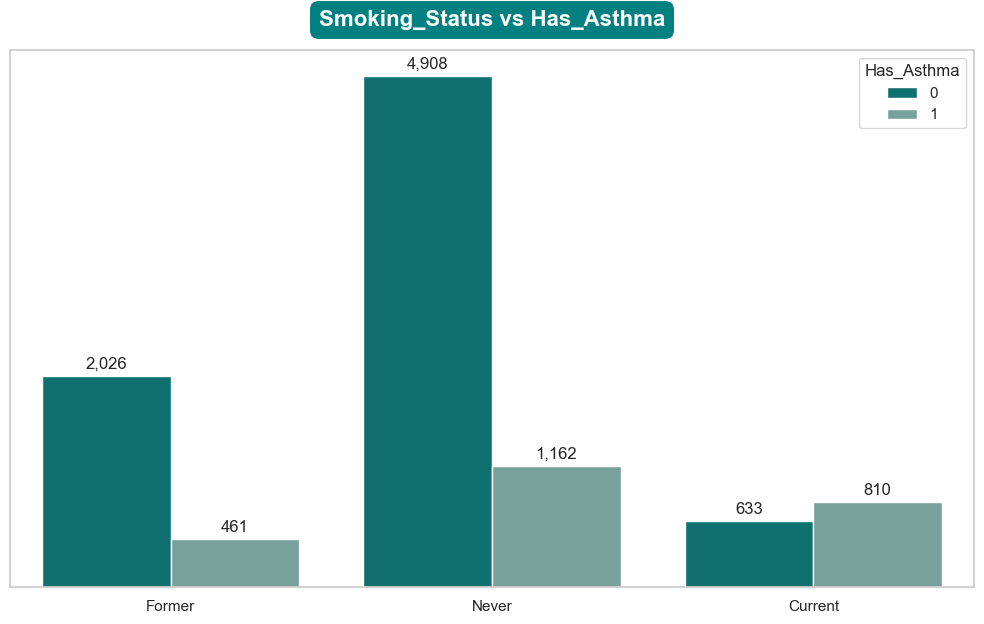

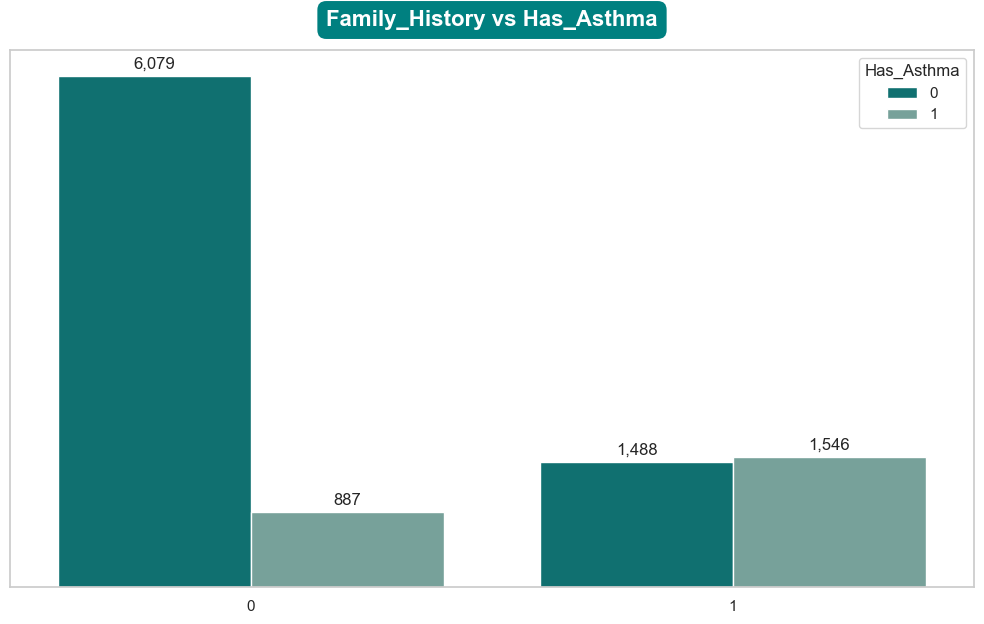

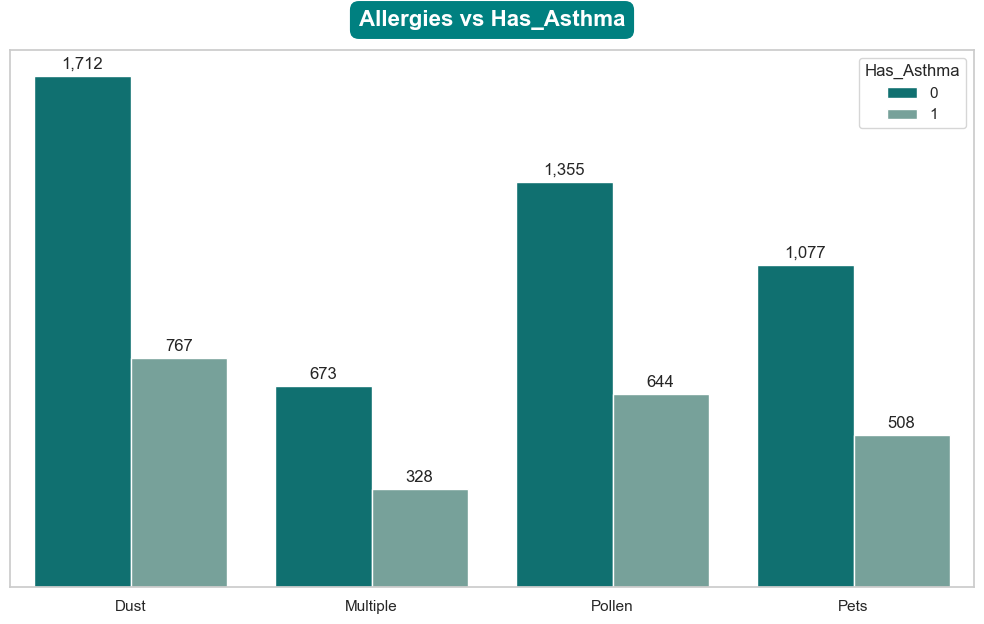

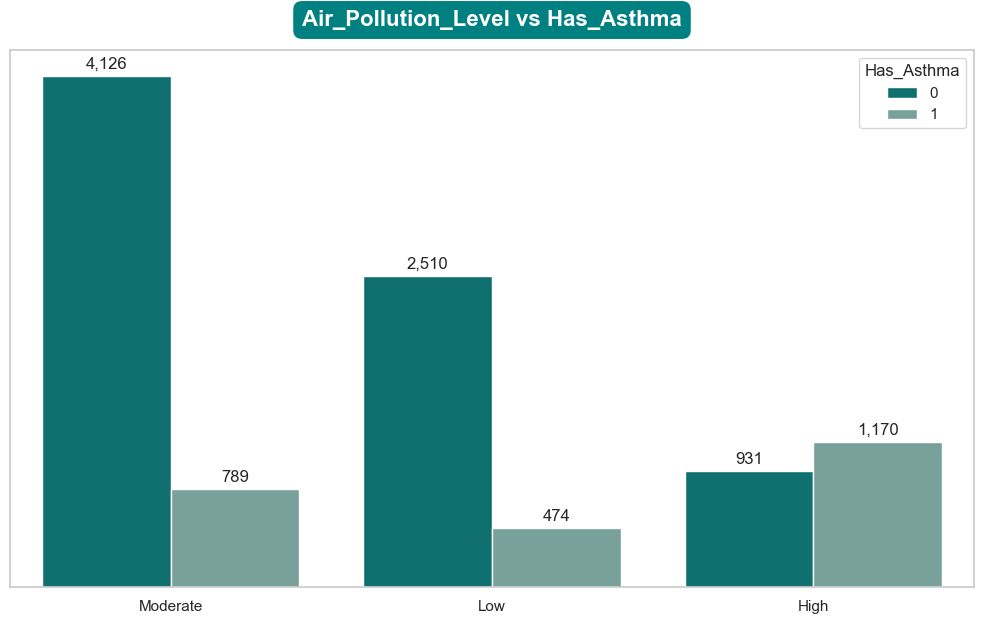

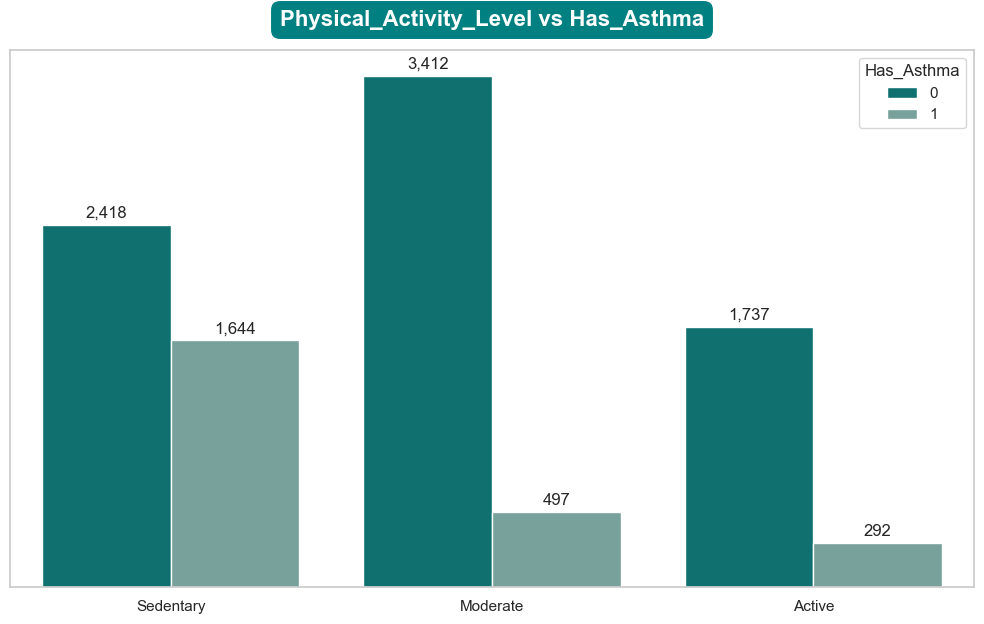

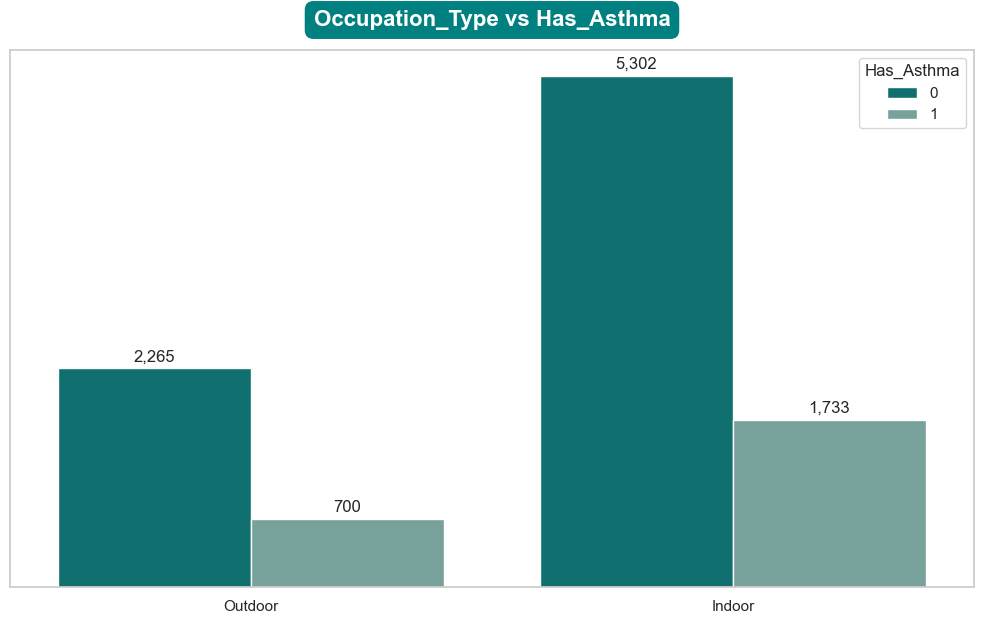

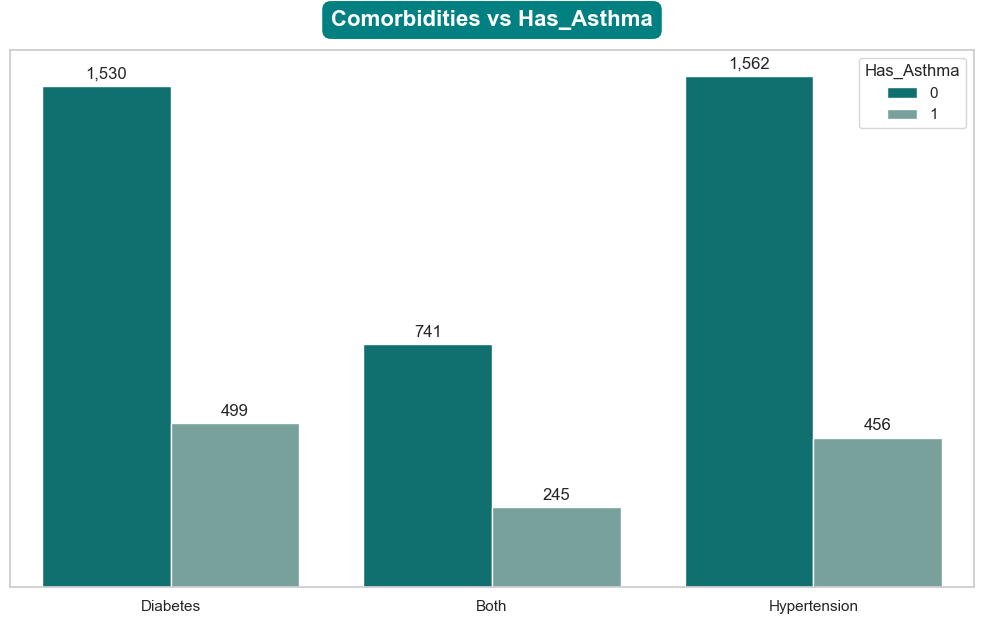

In [10]:
categorical_columns = ["Gender", "Smoking_Status", "Family_History", "Allergies", "Air_Pollution_Level",
            "Physical_Activity_Level", "Occupation_Type", "Comorbidities", "Asthma_Control_Level"]

for col in [c for c in categorical_columns if c != "Asthma_Control_Level"]:
    fig, ax = plt.subplots()
    bars = sns.countplot(x=col, hue="Has_Asthma", data=asthma_data, ax=ax, palette=custom_palette[:2])
    ax.set_ylabel(""), ax.set_yticks([]), ax.set_xlabel(""), plt.xticks(rotation=0)

    fig.text(0.5, 1.02, f"{col} vs Has_Asthma", ha="center", va="center",
             fontsize=16, fontweight="bold", color="white",
             bbox=dict(facecolor="#008080", edgecolor="none", boxstyle="round,pad=0.4"))

    for c in bars.containers:
        bars.bar_label(c, labels=[f"{int(v):,}" for v in c.datavalues], label_type="edge", padding=3)

    plt.tight_layout(), plt.show()

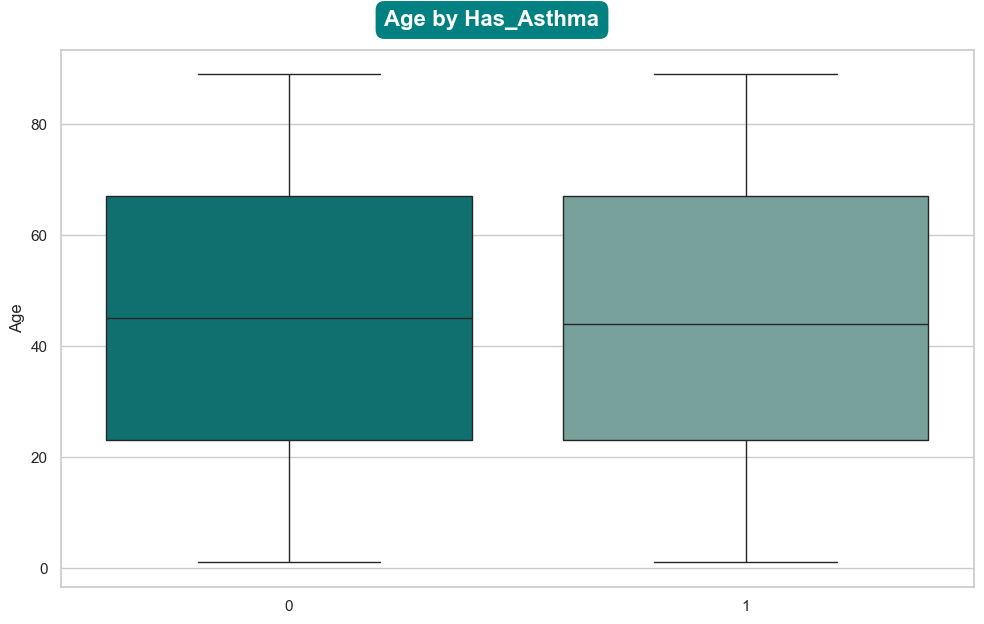

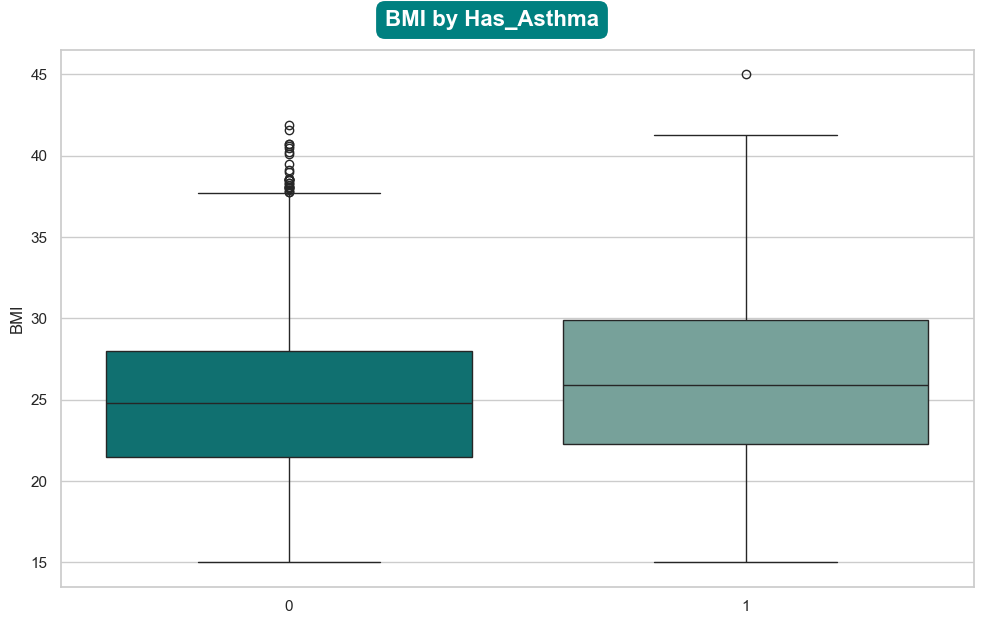

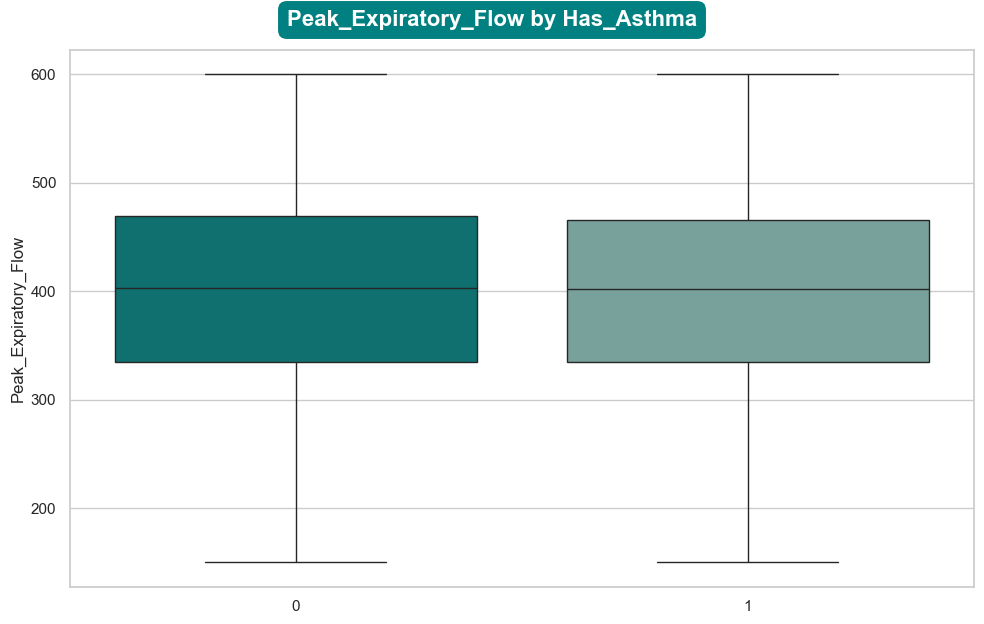

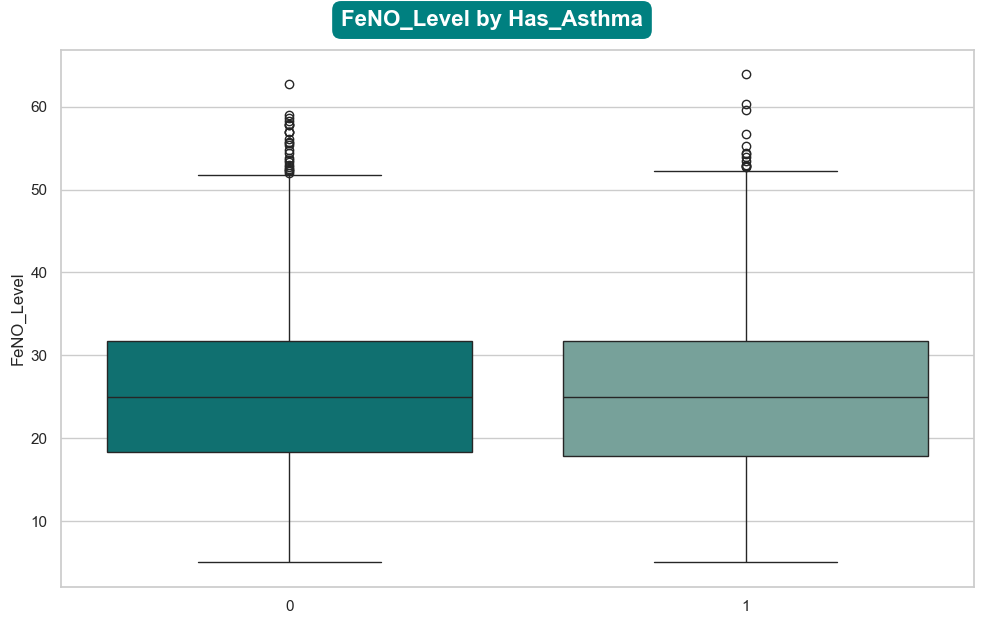

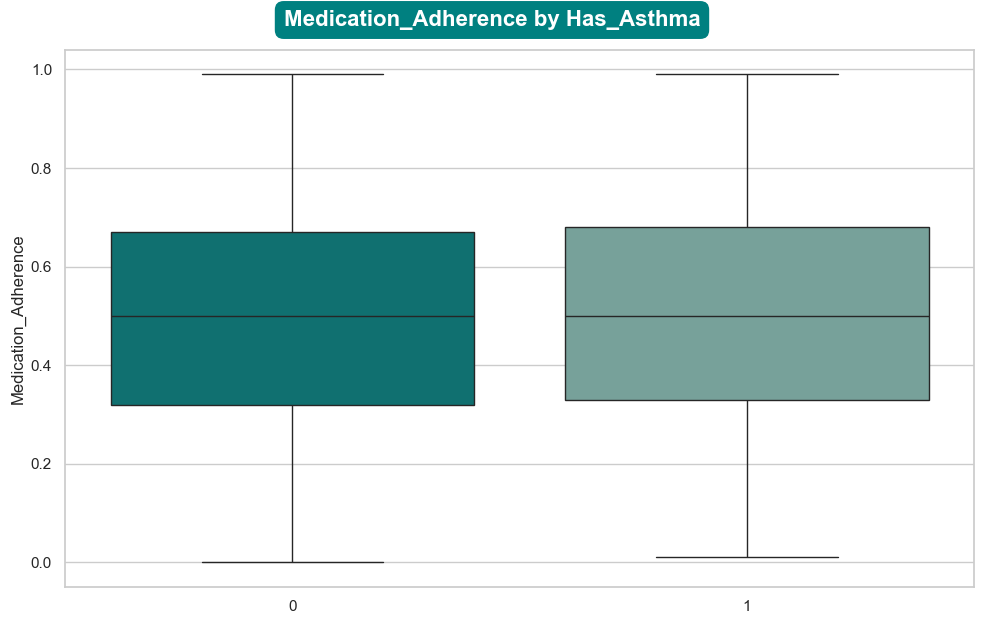

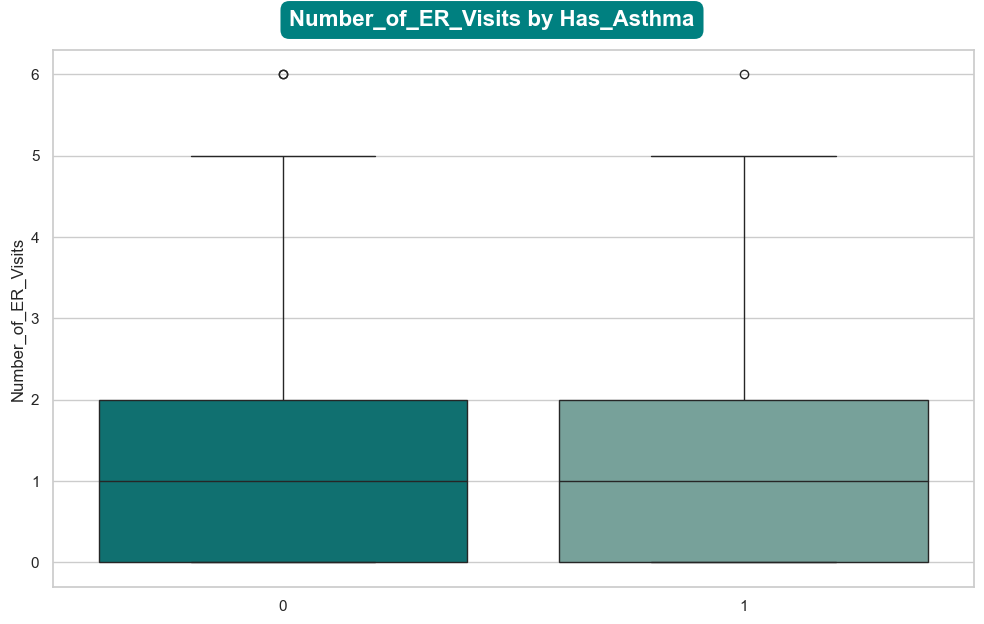

In [11]:
# Styled boxplots with header banner
numerical_columns = ["Age", "BMI", "Peak_Expiratory_Flow", "FeNO_Level", "Medication_Adherence", "Number_of_ER_Visits"]
for col in numerical_columns:
    fig, ax = plt.subplots()
    sns.boxplot(x="Has_Asthma", y=col, data=asthma_data, palette=custom_palette[:2], ax=ax)
    ax.set_xlabel("")
    
    fig.text(0.5, 1.02, f"{col} by Has_Asthma", ha="center", va="center",
             fontsize=16, fontweight="bold", color="white",
             bbox=dict(facecolor=custom_palette[0], edgecolor="none", boxstyle="round,pad=0.4"))
    
    plt.tight_layout(), plt.show()

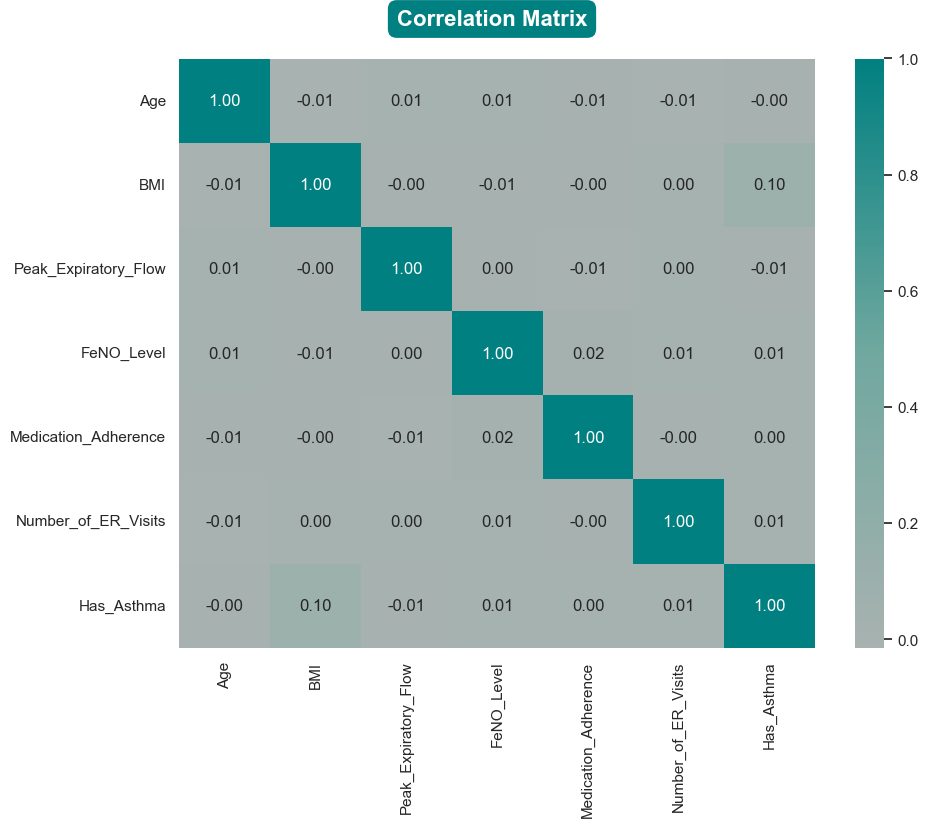

(None, None)

In [12]:
# Custom palette gradient for heatmap
from matplotlib.colors import LinearSegmentedColormap

custom_colors = ["#A8B2B0", "#70A89F", "#008080"]  # light grey to soft green to deep teal
custom_cmap = LinearSegmentedColormap.from_list("custom_teal", custom_colors)

# Correlation matrix
plt.figure(figsize=(10, 8))
corr = asthma_data[numerical_columns + ["Has_Asthma"]].corr()
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f")

# Title styling
plt.gcf().text(0.5, 1.02, "Correlation Matrix", ha="center", va="center", fontsize=16,
               fontweight="bold", color="white",
               bbox=dict(facecolor="#008080", edgecolor="none", boxstyle="round,pad=0.4"))

plt.tight_layout(), plt.show()


Asthma_Control_Level value counts:
 Asthma_Control_Level
Not Controlled       0.505138
Poorly Controlled    0.460337
Well Controlled      0.034525
Name: proportion, dtype: float64


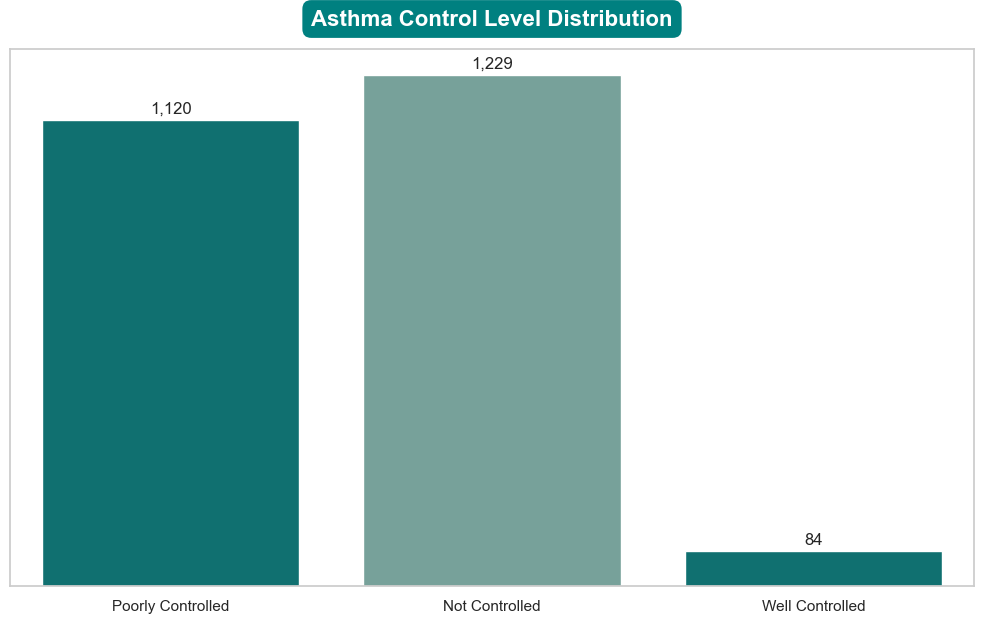

(None, None)

In [13]:
# 10. Asthma_Control_Level distribution (only for asthma patients)
control_data = asthma_data[asthma_data["Has_Asthma"] == 1]
print("\nAsthma_Control_Level value counts:\n", control_data["Asthma_Control_Level"].value_counts(normalize=True))

fig, ax = plt.subplots()
bars = sns.countplot(x="Asthma_Control_Level", data=control_data, palette=custom_palette[:3])
ax.set_ylabel(""), ax.set_yticks([]), ax.set_xlabel("")

fig.text(0.5, 1.02, "Asthma Control Level Distribution", ha="center", va="center",
         fontsize=16, fontweight="bold", color="white",
         bbox=dict(facecolor=custom_palette[0], edgecolor="none", boxstyle="round,pad=0.4"))

for c in bars.containers:
    bars.bar_label(c, labels=[f"{int(v):,}" for v in c.datavalues], label_type="edge", padding=3)

plt.tight_layout(), plt.show()

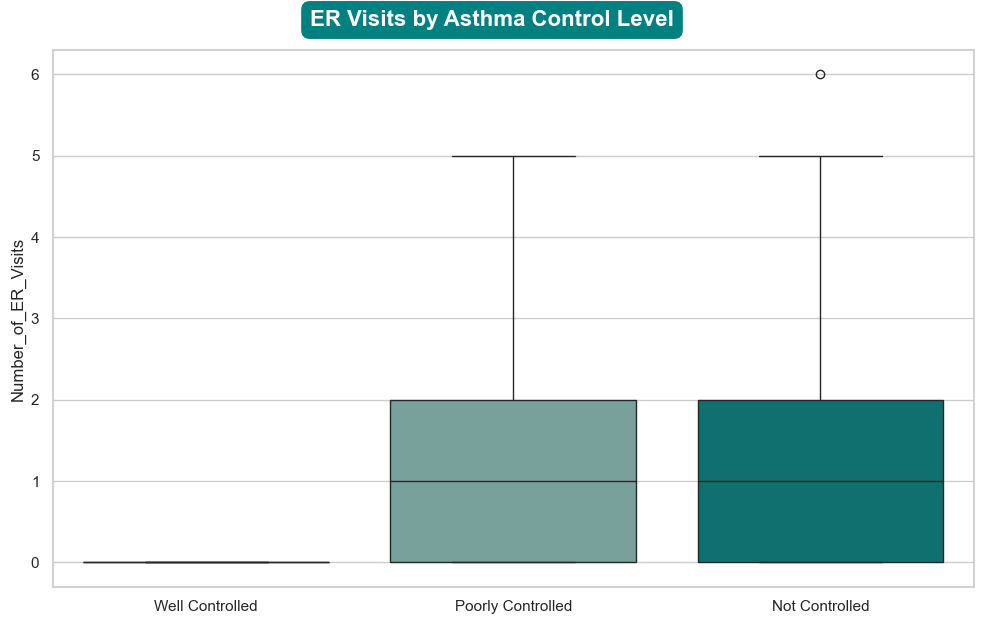

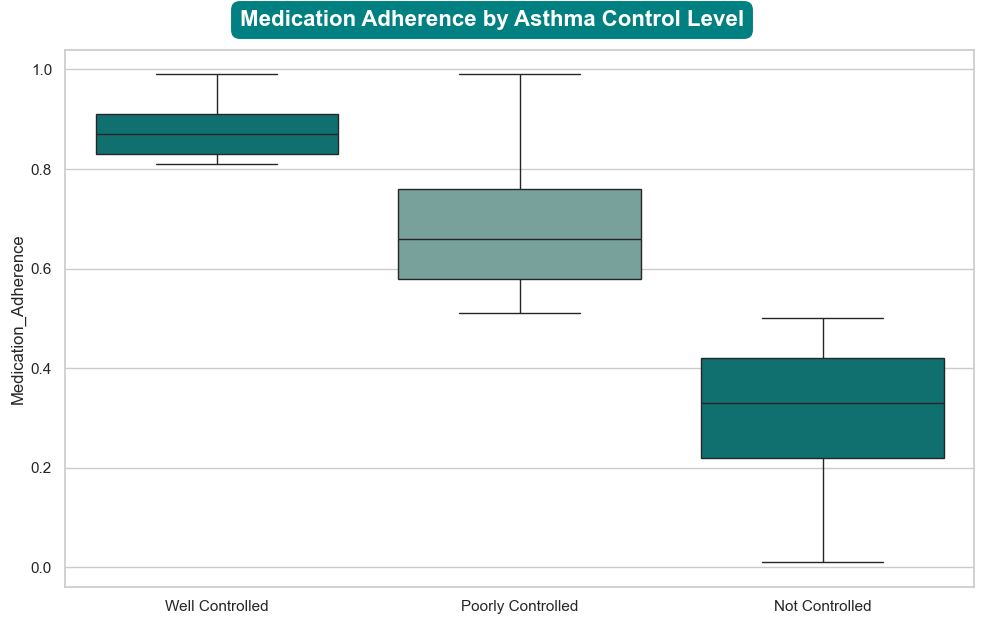

(None, None)

In [14]:
# Define custom palette (if not already set)
custom_palette = ["#008080", "#70A89F", "#A8B2B0", "#E7CBA9", "#BC6C25", "#264653"]

# ER Visits by Control Level
fig, ax = plt.subplots()
sns.boxplot(x="Asthma_Control_Level", y="Number_of_ER_Visits", data=control_data,
            order=["Well Controlled", "Poorly Controlled", "Not Controlled"], palette=custom_palette[:2], ax=ax)
ax.set_xlabel("")
fig.text(0.5, 1.02, "ER Visits by Asthma Control Level", ha="center", va="center", fontsize=16, fontweight="bold",
         color="white", bbox=dict(facecolor=custom_palette[0], edgecolor="none", boxstyle="round,pad=0.4"))
plt.tight_layout(), plt.show()

# Medication Adherence by Control Level
fig, ax = plt.subplots()
sns.boxplot(x="Asthma_Control_Level", y="Medication_Adherence", data=control_data,
            order=["Well Controlled", "Poorly Controlled", "Not Controlled"], palette=custom_palette[:2], ax=ax)
ax.set_xlabel("")
fig.text(0.5, 1.02, "Medication Adherence by Asthma Control Level", ha="center", va="center", fontsize=16, fontweight="bold",
         color="white", bbox=dict(facecolor=custom_palette[0], edgecolor="none", boxstyle="round,pad=0.4"))
plt.tight_layout(), plt.show()

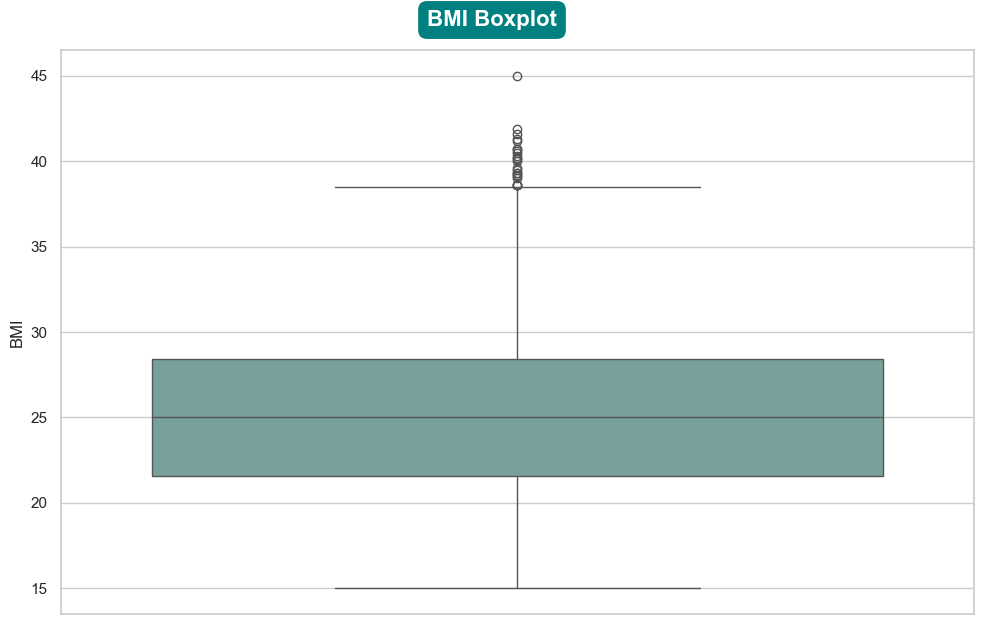

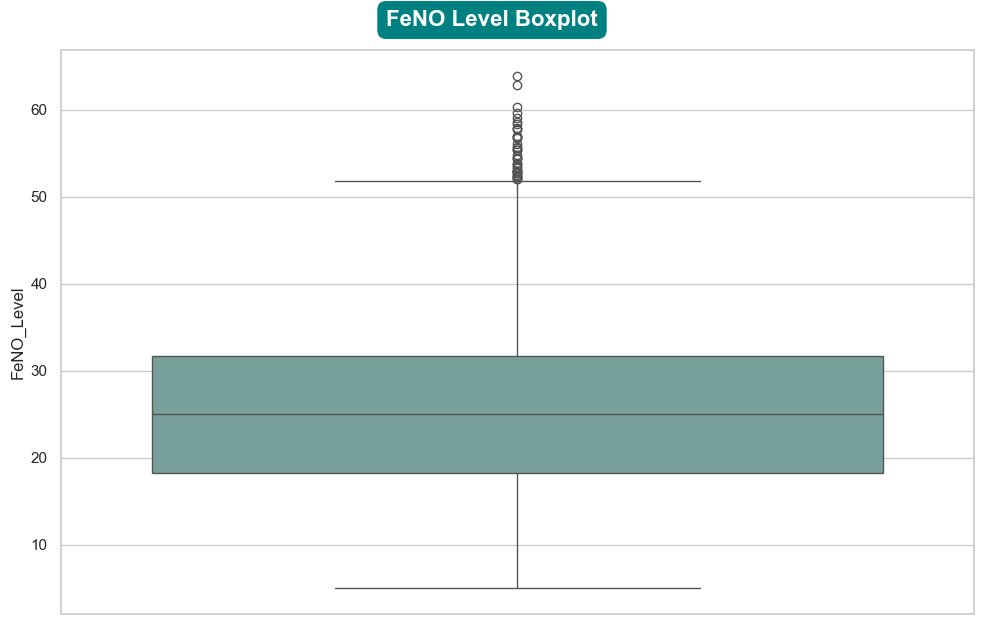

(None, None)

In [15]:
# Define custom palette
custom_palette = ["#008080", "#70A89F", "#A8B2B0", "#E7CBA9", "#BC6C25", "#264653"]

# BMI Boxplot (portrait)
fig, ax = plt.subplots()
sns.boxplot(y=asthma_data["BMI"], color=custom_palette[1], ax=ax)
fig.text(0.5, 1.02, "BMI Boxplot", ha="center", va="center", fontsize=16, fontweight="bold",
         color="white", bbox=dict(facecolor=custom_palette[0], edgecolor="none", boxstyle="round,pad=0.4"))
plt.tight_layout(), plt.show()

# FeNO Level Boxplot (portrait)
fig, ax = plt.subplots()
sns.boxplot(y=asthma_data["FeNO_Level"], color=custom_palette[1], ax=ax)
fig.text(0.5, 1.02, "FeNO Level Boxplot", ha="center", va="center", fontsize=16, fontweight="bold",
         color="white", bbox=dict(facecolor=custom_palette[0], edgecolor="none", boxstyle="round,pad=0.4"))
plt.tight_layout(), plt.show()

In [16]:
# 13. Statistical test examples (T-test for BMI by Has_Asthma)
from scipy.stats import ttest_ind, chi2_contingency

bmi_asthma = asthma_data[asthma_data["Has_Asthma"] == 1]["BMI"]
bmi_no_asthma = asthma_data[asthma_data["Has_Asthma"] == 0]["BMI"]
t_stat, p_val = ttest_ind(bmi_asthma, bmi_no_asthma)
print(f"T-test for BMI by Has_Asthma: t-stat={t_stat:.3f}, p-value={p_val:.3f}")

T-test for BMI by Has_Asthma: t-stat=9.890, p-value=0.000


In [17]:
# 14. Chi-square test for Smoking_Status vs Has_Asthma
contingency_table = pd.crosstab(asthma_data["Smoking_Status"], asthma_data["Has_Asthma"])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square test Smoking_Status vs Has_Asthma: chi2={chi2:.3f}, p-value={p:.3f}")

Chi-square test Smoking_Status vs Has_Asthma: chi2=926.792, p-value=0.000


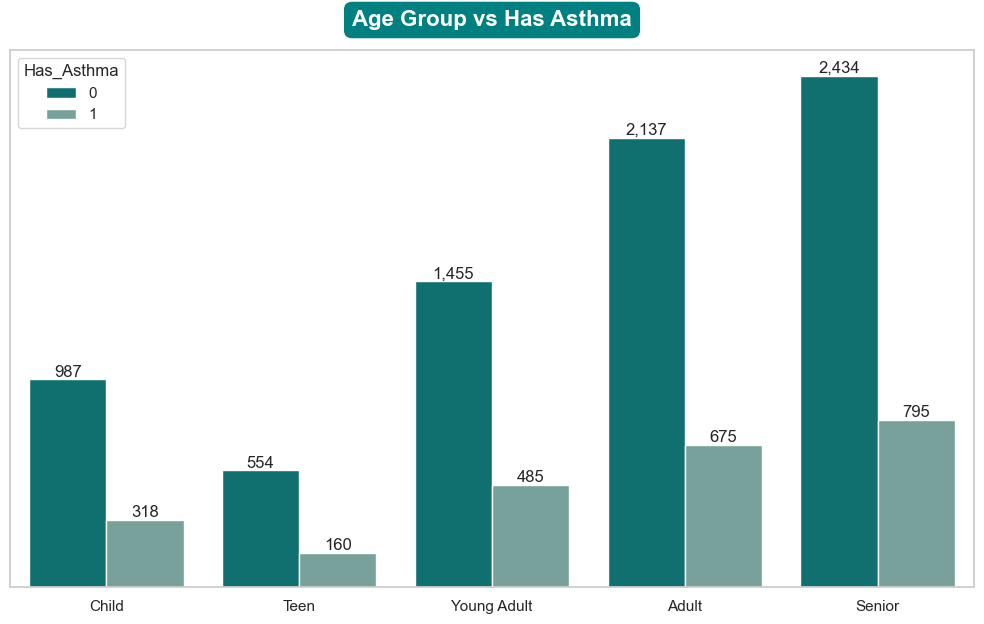

(None, None)

In [18]:
# Create Age Groups
asthma_data["Age_Group"] = pd.cut(asthma_data["Age"], [0,12,18,35,60,90],
                                  labels=["Child", "Teen", "Young Adult", "Adult", "Senior"])
custom_palette = ["#008080", "#70A89F", "#A8B2B0", "#E7CBA9", "#BC6C25", "#264653"]

# Styled Count Plot
fig, ax = plt.subplots()
bars = sns.countplot(x="Age_Group", hue="Has_Asthma", data=asthma_data, palette=custom_palette[:2])
ax.set(xlabel="", ylabel="", yticks=[])
fig.text(0.5, 1.02, "Age Group vs Has Asthma", ha="center", va="center", fontsize=16, fontweight="bold",
         color="white", bbox=dict(facecolor=custom_palette[0], boxstyle="round,pad=0.4"))
for c in bars.containers: bars.bar_label(c, labels=[f"{int(v):,}" for v in c.datavalues])

plt.tight_layout(), plt.show()

In [19]:
most_common = asthma_data["Allergies"].mode()[0]
asthma_data["Allergies"].fillna(most_common, inplace=True)

most_common = asthma_data["Comorbidities"].mode()[0]
asthma_data["Comorbidities"].fillna(most_common, inplace=True)

most_common = asthma_data["Asthma_Control_Level"].mode()[0]
asthma_data["Asthma_Control_Level"].fillna(most_common, inplace=True)

In [20]:
# Drop ID and non-useful columns
asthma_data = asthma_data.drop(columns=["Patient_ID", "Asthma_Control_Level","Age_Group"])

In [21]:
# Select column types
categorical_cols = asthma_data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = asthma_data.select_dtypes(include=["int64", "float64"]).drop("Has_Asthma", axis=1).columns.tolist()

# Preprocessing: encode categoricals, scale numericals
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Separate features/target
X = asthma_data.drop("Has_Asthma", axis=1)
y = asthma_data["Has_Asthma"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X, y)
joblib.dump(pipeline, "asthma_prediction_pipeline.pkl")

['asthma_prediction_pipeline.pkl']

In [22]:
pipeline = joblib.load("asthma_prediction_pipeline.pkl")

# Make Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [23]:
# 7. Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1504    0]
 [   0  496]]
Accuracy: 1.0
ROC AUC Score: 1.0


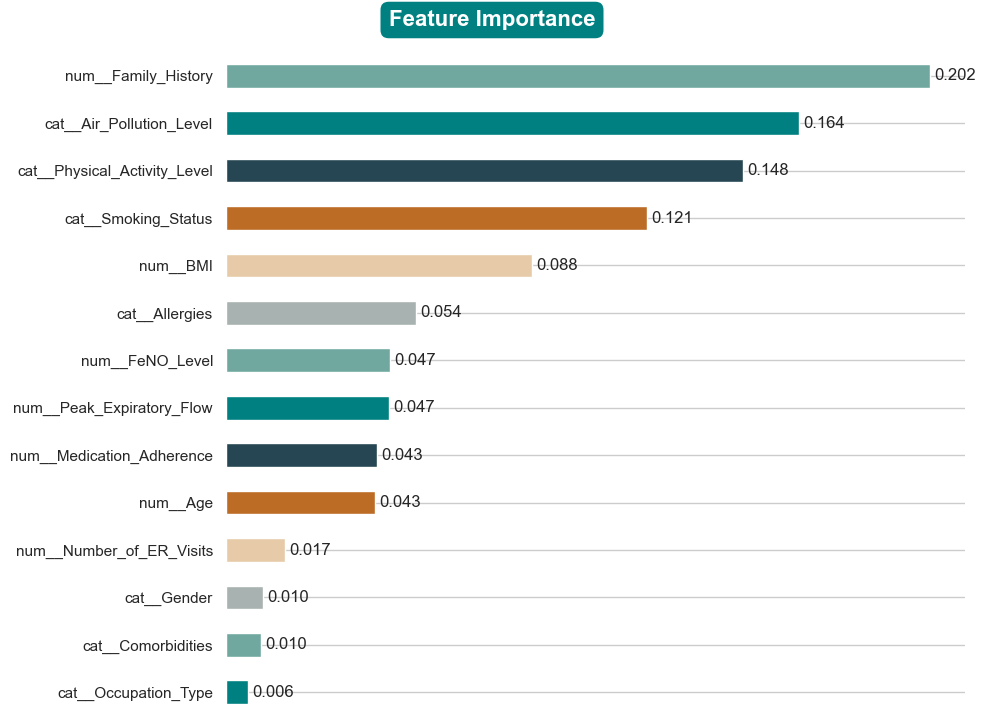

(None, None)

In [24]:
# Load pipeline and extract components
pipeline = joblib.load("asthma_prediction_pipeline.pkl")
model = pipeline.named_steps["classifier"]
features = pipeline.named_steps["preprocess"].get_feature_names_out()
importances = pd.Series(model.feature_importances_, index=features).sort_values()

# Plot with custom colors
palette = ["#008080", "#70A89F", "#A8B2B0", "#E7CBA9", "#BC6C25", "#264653"]
colors = [palette[i % len(palette)] for i in range(len(importances))]

fig, ax = plt.subplots(figsize=(10, 7))
bars = importances.plot(kind="barh", color=colors, ax=ax)
for spine in ax.spines.values(): spine.set_visible(False)
ax.set(xlabel="", ylabel="", xticks=[], facecolor="white")

fig.text(0.5, 1.02, "Feature Importance", ha="center", va="center", fontsize=16, fontweight="bold",
         color="white", bbox=dict(facecolor=palette[0], boxstyle="round,pad=0.4"))
bars.bar_label(ax.containers[0], fmt="%.3f", label_type="edge", padding=3)

plt.tight_layout(), plt.show()